# EDA


#### Imports

In [ ]:
from dotenv import find_dotenv, load_dotenv
import os
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

load_dotenv(find_dotenv())


True

#### variables

In [2]:
PROJECT_PATH=os.getenv('PROJECT_PATH')

#### Load dataset

In [3]:
df=pd.read_csv(f"{PROJECT_PATH}/data/fics/external/chess-games.csv")
df

/home/ariel/Documents/bgu/chess_improments_patterns/src/data/fics_utils.py:5: DtypeWarning: Columns (5,6,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file)


,Unnamed: 0.1,Unnamed: 0,Black,BlackClock,BlackElo,BlackIsComp,BlackRD,Date,ECO,Event,...,Result,Round,Site,Time,TimeControl,White,WhiteClock,WhiteElo,WhiteRD,WhiteIsComp
0,0,0,LochChessMonster,0:15:00.000,1745,Yes,25.4,2022.09.12,B12,FICS rated standard game,...,1-0,?,FICS freechess.org,08:40:00,900+0,Mundt,0:15:00.000,1602,38.9,NaN
1,1,1,ImBeliever,0:15:00.000,1861,?,34.8,2022.09.12,D02,FICS rated standard game,...,1-0,?,FICS freechess.org,08:44:00,900+0,loomba,0:15:00.000,1901,32.6,NaN
2,2,2,hecklepeckle,0:15:00.000,1619,?,34.2,2022.09.12,C50,FICS rated standard game,...,0-1,?,FICS freechess.org,08:39:00,900+0,BestMatz,0:15:00.000,1606,44.5,NaN
3,3,3,circum,0:15:00.000,1440,?,28.8,2022.09.12,C10,FICS rated standard game,...,1-0,?,FICS freechess.org,08:32:00,900+0,rusalka,0:15:00.000,1618,25.5,NaN
4,4,4,vandi,0:15:00.000,1939,?,29.6,2022.09.12,A00,FICS rated standard game,...,1-0,?,FICS freechess.org,08:47:00,900+0,Achonk,0:15:00.000,1938,35.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18492769,2117860,9995,DonatiNair,0:15:00.000,1775,NaN,na,2013.12.12,A02,FICS rated standard game,...,0-1,?,FICS freechess.org,10:19:00,900+0,Romagnoli,0:15:00.000,1691,na,NaN
18492770,2117861,9996,compaqMayank,0:15:00.000,1612,NaN,na,2013.12.12,A45,FICS rated standard game,...,1-0,?,FICS freechess.org,10:01:00,900+0,FredMICH,0:15:00.000,1517,na,NaN
18492771,2117862,9997,mortalaffront,0:13:00.000,1867,NaN,na,2013.12.12,A00,FICS rated standard game,...,1-0,?,FICS freechess.org,10:21:00,780+5,rojmedi,0:13:00.000,1748,na,NaN
18492772,2117863,9998,KarnatakaDon,0:15:00.000,1186,NaN,na,2013.12.12,C25,FICS rated standard game,...,1-0,?,FICS freechess.org,10:23:00,900+0,Divljak,0:15:00.000,1855,na,NaN


#### Remove unnecceary columns and save the cleaned result

In [31]:
df=df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df["Year"]=df["Date"].apply(lambda r:r.split(".")[0])
df=df.drop(columns="Site")
df=df.drop(columns="Round")
df=df.drop(columns="WhiteIsComp")
df=df.drop(columns="BlackIsComp")
df.to_csv(f"{PROJECT_PATH}/data/fics/interim/chess-games-clean.csv")

#### Read the cleaned data for sanity

In [ ]:
df=pd.read_csv(f"{PROJECT_PATH}/data/fics/interim/chess-games-clean.csv")
df

#### Win rate

In [9]:
df["EloDiff"] = df["WhiteElo"] - df["BlackElo"]
df["RelativeEloDiff"] = (
    ((df["WhiteElo"] / (df[["WhiteElo", "BlackElo"]].median(axis=1))) - 1.0) * 100.0
).round(2)
display(df.head())

,Unnamed: 0.1,Unnamed: 0,Black,BlackClock,BlackElo,BlackIsComp,BlackRD,Date,ECO,Event,...,Site,Time,TimeControl,White,WhiteClock,WhiteElo,WhiteRD,WhiteIsComp,EloDiff,RelativeEloDiff
0,0,0,LochChessMonster,0:15:00.000,1745,Yes,25.4,2022.09.12,B12,FICS rated standard game,...,FICS freechess.org,08:40:00,900+0,Mundt,0:15:00.000,1602,38.9,NaN,-143,-4.27
1,1,1,ImBeliever,0:15:00.000,1861,?,34.8,2022.09.12,D02,FICS rated standard game,...,FICS freechess.org,08:44:00,900+0,loomba,0:15:00.000,1901,32.6,NaN,40,1.06
2,2,2,hecklepeckle,0:15:00.000,1619,?,34.2,2022.09.12,C50,FICS rated standard game,...,FICS freechess.org,08:39:00,900+0,BestMatz,0:15:00.000,1606,44.5,NaN,-13,-0.40
3,3,3,circum,0:15:00.000,1440,?,28.8,2022.09.12,C10,FICS rated standard game,...,FICS freechess.org,08:32:00,900+0,rusalka,0:15:00.000,1618,25.5,NaN,178,5.82
4,4,4,vandi,0:15:00.000,1939,?,29.6,2022.09.12,A00,FICS rated standard game,...,FICS freechess.org,08:47:00,900+0,Achonk,0:15:00.000,1938,35.4,NaN,-1,-0.03


In [29]:
def win_rate_by_elo_diff(df,elo_diff):
    try:
        win_freq=Counter(df[df["EloDiff"] > elo_diff]["Result"])
        white_won=win_freq["1-0"]
        draw=win_freq["1/2-1/2"]
        black_won=win_freq["0-1"]
        total=white_won+draw+black_won
        white_wins_proportion = white_won / total
        white_loss_proportion = black_won / total
        draw_proportion = draw / total
        return pd.DataFrame({
            'EloDiff':[elo_diff],
            'TotalGames':[total],
            'WhiteWon':[white_won],
            'WhiteWinsProportion':[white_wins_proportion],
            'WhiteLossProportion':[white_loss_proportion],
            'BlackWon':[black_won],
            'Draw':[draw],
            'DrawProportion':[draw_proportion],
        })
    except Exception as err:
           return pd.DataFrame({
            'EloDiff':[ ],
            'TotalGames':[ ],
            'WhiteWon':[ ],
            'WhiteWinsProportion':[ ],
            'WhiteLossProportion':[ ],
            'BlackWon':[ ],
            'Draw':[ ],
            'DrawProportion':[ ],
        })

-------------------------------------------------- Player ratio --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,364666.0,349219.0,0.957641,0.032756,11945.0,3502.0,0.009603
0,800.0,129385.0,126448.0,0.977300,0.016880,2184.0,753.0,0.005820
0,1000.0,47105.0,46552.0,0.988260,0.009235,435.0,118.0,0.002505
0,1200.0,15401.0,15257.0,0.990650,0.007142,110.0,34.0,0.002208
0,1400.0,4020.0,3992.0,0.993035,0.005224,21.0,7.0,0.001741
0,1600.0,676.0,675.0,0.998521,0.001479,1.0,0.0,0.000000
0,1800.0,111.0,110.0,0.990991,0.009009,1.0,0.0,0.000000
0,2000.0,18.0,18.0,1.000000,0.000000,0.0,0.0,0.000000
0,2200.0,3.0,3.0,1.000000,0.000000,0.0,0.0,0.000000


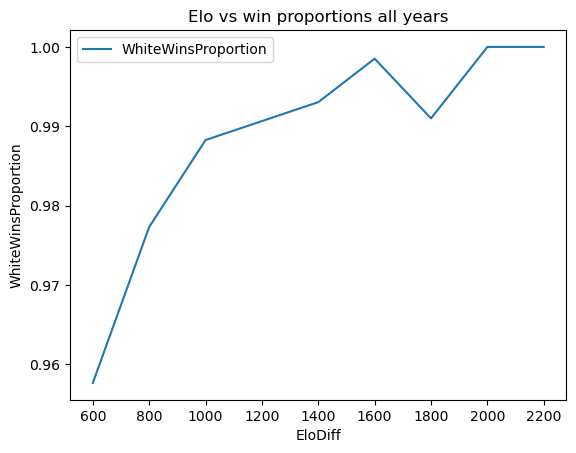

In [36]:
frames=[]
for diff in np.arange(600,3601, 200):
    frames.append(win_rate_by_elo_diff(df,diff))

frames_df=pd.concat(frames)
print("-"*50,"Player ratio","-"*50)
display(frames_df)
ax= frames_df.plot.line(x='EloDiff', y='WhiteWinsProportion')

ax.set_xlabel("EloDiff")
ax.set_ylabel("WhiteWinsProportion")
ax.set_title("Elo vs win proportions all years")

ax.figure.savefig(f"{PROJECT_PATH}/reports/figures/fics/Elo-vs-win-proportions-all-years.png")

-------------------------------------------------- Player ratio for year 2002 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion


-------------------------------------------------- Player ratio for year 2003 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion


-------------------------------------------------- Player ratio for year 2004 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
0,800.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


-------------------------------------------------- Player ratio for year 2005 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0
0,800.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
0,1000.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
0,1200.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


-------------------------------------------------- Player ratio for year 2006 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0


-------------------------------------------------- Player ratio for year 2007 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,6.0,4.0,0.666667,0.333333,2.0,0.0,0.0
0,800.0,1.0,1.0,1.000000,0.000000,0.0,0.0,0.0


-------------------------------------------------- Player ratio for year 2008 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,63.0,44.0,0.698413,0.301587,19.0,0.0,0.0
0,800.0,17.0,12.0,0.705882,0.294118,5.0,0.0,0.0
0,1000.0,3.0,3.0,1.000000,0.000000,0.0,0.0,0.0
0,1200.0,1.0,1.0,1.000000,0.000000,0.0,0.0,0.0


-------------------------------------------------- Player ratio for year 2009 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,27807.0,26443.0,0.950948,0.039702,1104.0,260.0,0.009350
0,800.0,11640.0,11439.0,0.982732,0.012629,147.0,54.0,0.004639
0,1000.0,4270.0,4227.0,0.989930,0.007963,34.0,9.0,0.002108
0,1200.0,1043.0,1030.0,0.987536,0.011505,12.0,1.0,0.000959
0,1400.0,156.0,149.0,0.955128,0.038462,6.0,1.0,0.006410
0,1600.0,8.0,8.0,1.000000,0.000000,0.0,0.0,0.000000
0,1800.0,1.0,1.0,1.000000,0.000000,0.0,0.0,0.000000


-------------------------------------------------- Player ratio for year 2010 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,31070.0,29516.0,0.949984,0.039363,1223.0,331.0,0.010653
0,800.0,12064.0,11757.0,0.974552,0.017739,214.0,93.0,0.007709
0,1000.0,4079.0,4033.0,0.988723,0.008826,36.0,10.0,0.002452
0,1200.0,816.0,809.0,0.991422,0.008578,7.0,0.0,0.000000
0,1400.0,145.0,144.0,0.993103,0.006897,1.0,0.0,0.000000
0,1600.0,16.0,16.0,1.000000,0.000000,0.0,0.0,0.000000
0,1800.0,3.0,3.0,1.000000,0.000000,0.0,0.0,0.000000
0,2000.0,2.0,2.0,1.000000,0.000000,0.0,0.0,0.000000
0,2200.0,2.0,2.0,1.000000,0.000000,0.0,0.0,0.000000


-------------------------------------------------- Player ratio for year 2011 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,33122.0,31247.0,0.943391,0.043989,1457.0,418.0,0.012620
0,800.0,11152.0,10796.0,0.968077,0.022776,254.0,102.0,0.009146
0,1000.0,3135.0,3079.0,0.982137,0.014673,46.0,10.0,0.003190
0,1200.0,751.0,749.0,0.997337,0.002663,2.0,0.0,0.000000
0,1400.0,200.0,200.0,1.000000,0.000000,0.0,0.0,0.000000
0,1600.0,48.0,48.0,1.000000,0.000000,0.0,0.0,0.000000
0,1800.0,9.0,9.0,1.000000,0.000000,0.0,0.0,0.000000


-------------------------------------------------- Player ratio for year 2012 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,48603.0,46062.0,0.947719,0.040286,1958.0,583.0,0.011995
0,800.0,13166.0,12609.0,0.957694,0.031824,419.0,138.0,0.010482
0,1000.0,3960.0,3899.0,0.984596,0.014394,57.0,4.0,0.001010
0,1200.0,1563.0,1554.0,0.994242,0.005118,8.0,1.0,0.000640
0,1400.0,426.0,423.0,0.992958,0.007042,3.0,0.0,0.000000
0,1600.0,52.0,52.0,1.000000,0.000000,0.0,0.0,0.000000
0,1800.0,3.0,3.0,1.000000,0.000000,0.0,0.0,0.000000
0,2000.0,2.0,2.0,1.000000,0.000000,0.0,0.0,0.000000
0,2200.0,1.0,1.0,1.000000,0.000000,0.0,0.0,0.000000


-------------------------------------------------- Player ratio for year 2013 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,54548.0,52402.0,0.960659,0.029460,1607.0,539.0,0.009881
0,800.0,19769.0,19348.0,0.978704,0.015782,312.0,109.0,0.005514
0,1000.0,7731.0,7677.0,0.993015,0.006079,47.0,7.0,0.000905
0,1200.0,2984.0,2976.0,0.997319,0.002346,7.0,1.0,0.000335
0,1400.0,719.0,717.0,0.997218,0.002782,2.0,0.0,0.000000
0,1600.0,87.0,87.0,1.000000,0.000000,0.0,0.0,0.000000
0,1800.0,3.0,3.0,1.000000,0.000000,0.0,0.0,0.000000


-------------------------------------------------- Player ratio for year 2014 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,32204.0,31240.0,0.970066,0.024407,786.0,178.0,0.005527
0,800.0,12501.0,12371.0,0.989601,0.008159,102.0,28.0,0.002240
0,1000.0,4506.0,4478.0,0.993786,0.005104,23.0,5.0,0.001110
0,1200.0,1425.0,1420.0,0.996491,0.002105,3.0,2.0,0.001404
0,1400.0,322.0,321.0,0.996894,0.000000,0.0,1.0,0.003106
0,1600.0,27.0,27.0,1.000000,0.000000,0.0,0.0,0.000000
0,1800.0,2.0,2.0,1.000000,0.000000,0.0,0.0,0.000000


-------------------------------------------------- Player ratio for year 2015 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,24680.0,23876.0,0.967423,0.026823,662.0,142.0,0.005754
0,800.0,8764.0,8624.0,0.984026,0.012437,109.0,31.0,0.003537
0,1000.0,2494.0,2472.0,0.991179,0.007217,18.0,4.0,0.001604
0,1200.0,371.0,368.0,0.991914,0.008086,3.0,0.0,0.000000
0,1400.0,29.0,28.0,0.965517,0.034483,1.0,0.0,0.000000
0,1600.0,11.0,11.0,1.000000,0.000000,0.0,0.0,0.000000


-------------------------------------------------- Player ratio for year 2016 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,18882.0,18004.0,0.953501,0.039985,755.0,123.0,0.006514
0,800.0,5697.0,5466.0,0.959452,0.034229,195.0,36.0,0.006319
0,1000.0,1454.0,1393.0,0.958047,0.037139,54.0,7.0,0.004814
0,1200.0,353.0,336.0,0.951841,0.048159,17.0,0.0,0.000000
0,1400.0,76.0,76.0,1.000000,0.000000,0.0,0.0,0.000000
0,1600.0,13.0,13.0,1.000000,0.000000,0.0,0.0,0.000000


-------------------------------------------------- Player ratio for year 2017 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,18315.0,17722.0,0.967622,0.025116,460.0,133.0,0.007262
0,800.0,6926.0,6820.0,0.984695,0.011406,79.0,27.0,0.003898
0,1000.0,2449.0,2426.0,0.990608,0.006533,16.0,7.0,0.002858
0,1200.0,770.0,758.0,0.984416,0.009091,7.0,5.0,0.006494
0,1400.0,122.0,122.0,1.000000,0.000000,0.0,0.0,0.000000
0,1600.0,15.0,15.0,1.000000,0.000000,0.0,0.0,0.000000
0,1800.0,2.0,2.0,1.000000,0.000000,0.0,0.0,0.000000


-------------------------------------------------- Player ratio for year 2018 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,21346.0,20724.0,0.970861,0.021034,449.0,173.0,0.008105
0,800.0,8792.0,8699.0,0.989422,0.008076,71.0,22.0,0.002502
0,1000.0,4303.0,4273.0,0.993028,0.005578,24.0,6.0,0.001394
0,1200.0,1638.0,1626.0,0.992674,0.006716,11.0,1.0,0.000611
0,1400.0,423.0,421.0,0.995272,0.002364,1.0,1.0,0.002364
0,1600.0,63.0,63.0,1.000000,0.000000,0.0,0.0,0.000000
0,1800.0,1.0,1.0,1.000000,0.000000,0.0,0.0,0.000000


-------------------------------------------------- Player ratio for year 2019 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,16138.0,15585.0,0.965733,0.026893,434.0,119.0,0.007374
0,800.0,6263.0,6137.0,0.979882,0.017883,112.0,14.0,0.002235
0,1000.0,2469.0,2447.0,0.991090,0.007290,18.0,4.0,0.001620
0,1200.0,759.0,752.0,0.990777,0.006588,5.0,2.0,0.002635
0,1400.0,180.0,176.0,0.977778,0.011111,2.0,2.0,0.011111
0,1600.0,26.0,26.0,1.000000,0.000000,0.0,0.0,0.000000
0,1800.0,2.0,2.0,1.000000,0.000000,0.0,0.0,0.000000


-------------------------------------------------- Player ratio for year 2020 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,12700.0,12230.0,0.962992,0.026457,336.0,134.0,0.010551
0,800.0,4822.0,4752.0,0.985483,0.009540,46.0,24.0,0.004977
0,1000.0,2540.0,2509.0,0.987795,0.006299,16.0,15.0,0.005906
0,1200.0,1250.0,1232.0,0.985600,0.007200,9.0,9.0,0.007200
0,1400.0,400.0,399.0,0.997500,0.002500,1.0,0.0,0.000000
0,1600.0,71.0,71.0,1.000000,0.000000,0.0,0.0,0.000000
0,1800.0,10.0,10.0,1.000000,0.000000,0.0,0.0,0.000000
0,2000.0,1.0,1.0,1.000000,0.000000,0.0,0.0,0.000000


-------------------------------------------------- Player ratio for year 2021 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,10720.0,10272.0,0.958209,0.026679,286.0,162.0,0.015112
0,800.0,3763.0,3678.0,0.977412,0.011959,45.0,40.0,0.010630
0,1000.0,1720.0,1692.0,0.983721,0.009302,16.0,12.0,0.006977
0,1200.0,908.0,895.0,0.985683,0.006608,6.0,7.0,0.007709
0,1400.0,440.0,438.0,0.995455,0.004545,2.0,0.0,0.000000
0,1600.0,74.0,73.0,0.986486,0.013514,1.0,0.0,0.000000
0,1800.0,10.0,9.0,0.900000,0.100000,1.0,0.0,0.000000


-------------------------------------------------- Player ratio for year 2022 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,6895.0,6615.0,0.959391,0.026396,182.0,98.0,0.014213
0,800.0,2328.0,2277.0,0.978093,0.014175,33.0,18.0,0.007732
0,1000.0,1261.0,1241.0,0.984140,0.009516,12.0,8.0,0.006344
0,1200.0,493.0,490.0,0.993915,0.006085,3.0,0.0,0.000000
0,1400.0,232.0,231.0,0.995690,0.004310,1.0,0.0,0.000000
0,1600.0,99.0,99.0,1.000000,0.000000,0.0,0.0,0.000000
0,1800.0,35.0,35.0,1.000000,0.000000,0.0,0.0,0.000000
0,2000.0,12.0,12.0,1.000000,0.000000,0.0,0.0,0.000000


/home/ariel/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


-------------------------------------------------- Player ratio for year 2023 --------------------------------------------------


,EloDiff,TotalGames,WhiteWon,WhiteWinsProportion,WhiteLossProportion,BlackWon,Draw,DrawProportion
0,600.0,7562.0,7230.0,0.956096,0.029490,223.0,109.0,0.014414
0,800.0,1718.0,1660.0,0.966240,0.023865,41.0,17.0,0.009895
0,1000.0,730.0,702.0,0.961644,0.024658,18.0,10.0,0.013699
0,1200.0,275.0,260.0,0.945455,0.036364,10.0,5.0,0.018182
0,1400.0,150.0,147.0,0.980000,0.006667,1.0,2.0,0.013333
0,1600.0,66.0,66.0,1.000000,0.000000,0.0,0.0,0.000000
0,1800.0,30.0,30.0,1.000000,0.000000,0.0,0.0,0.000000
0,2000.0,1.0,1.0,1.000000,0.000000,0.0,0.0,0.000000


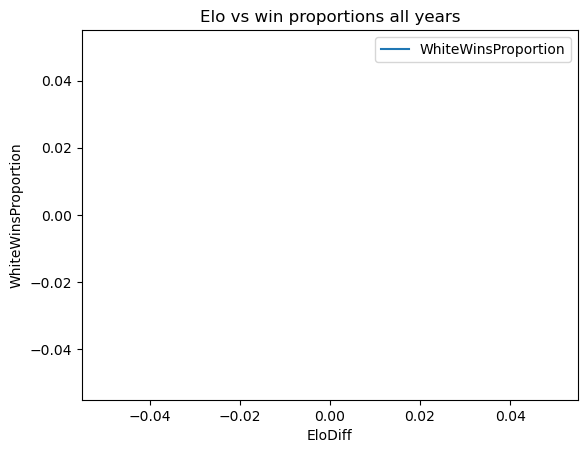

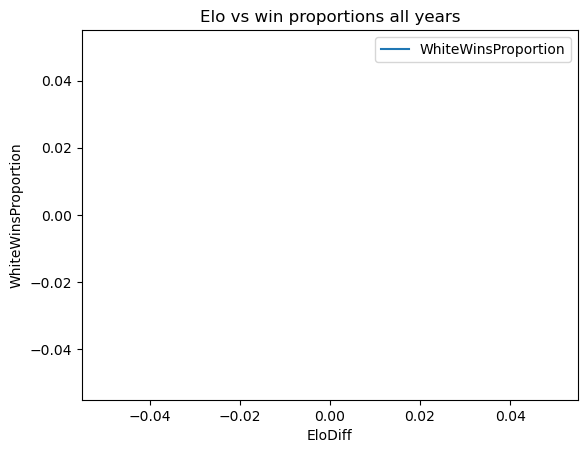

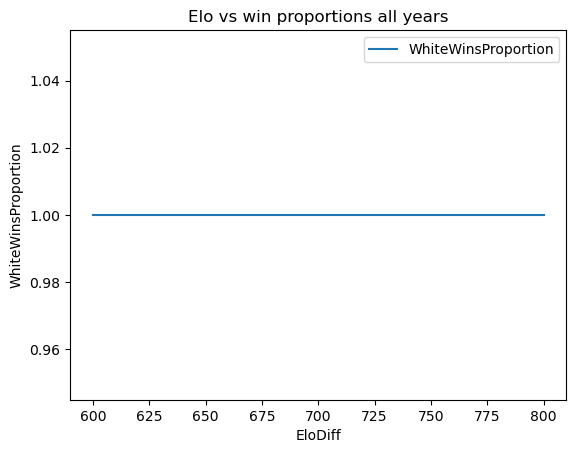

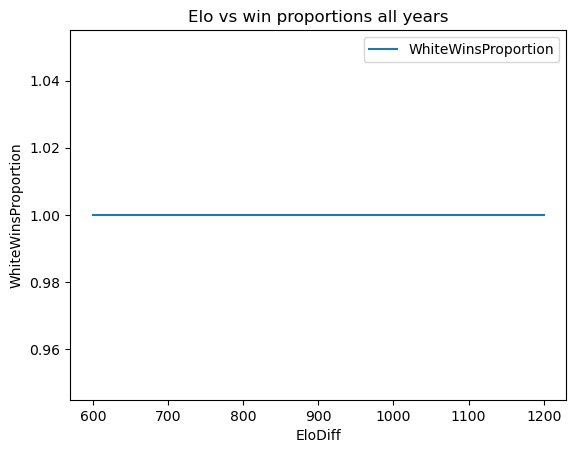

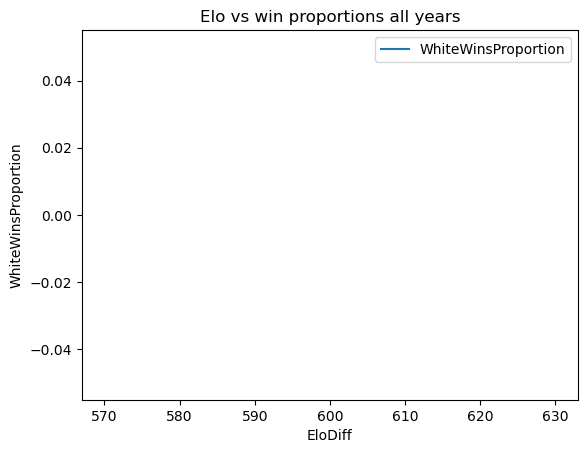

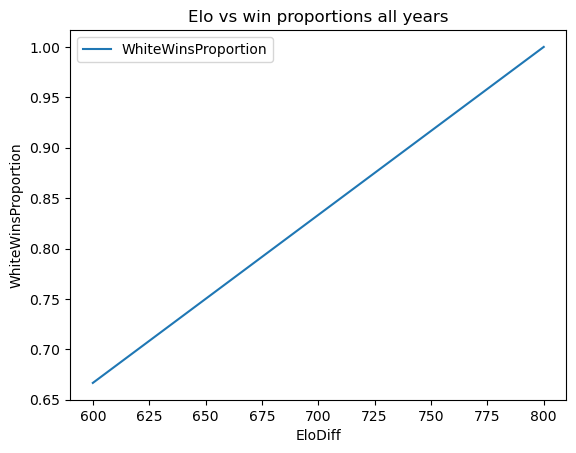

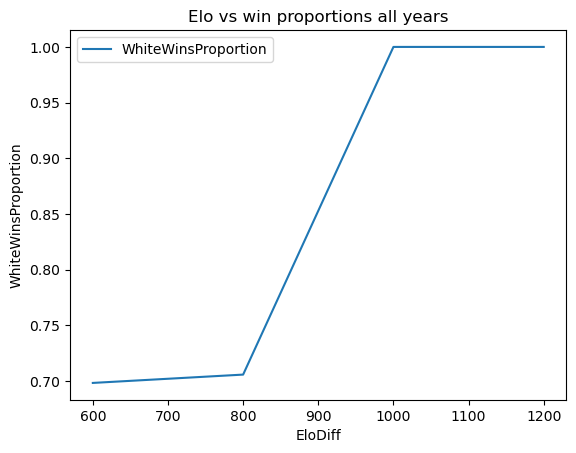

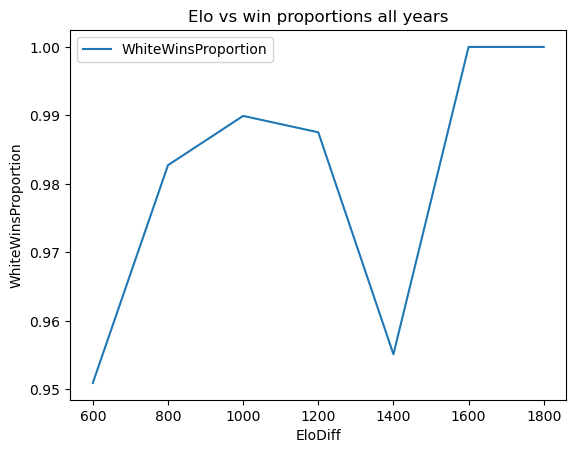

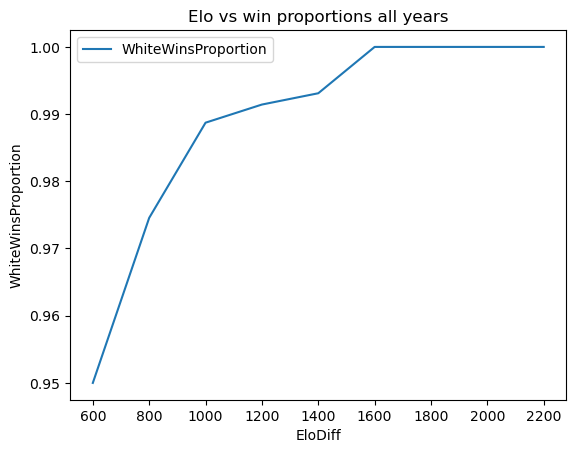

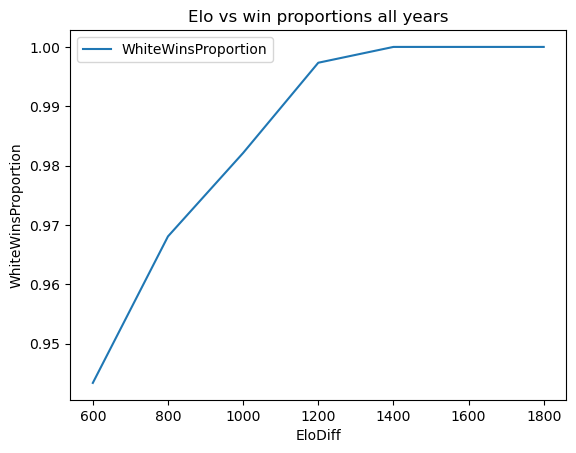

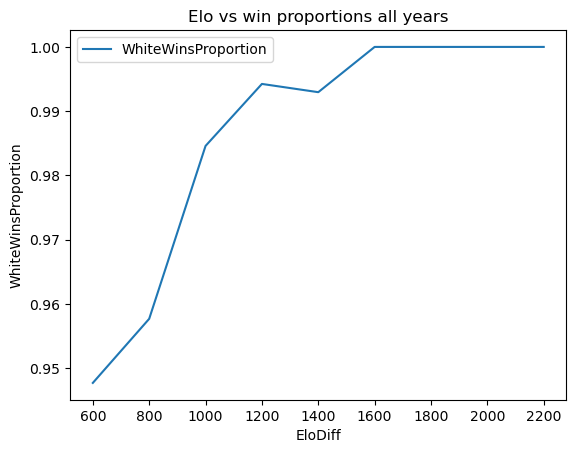

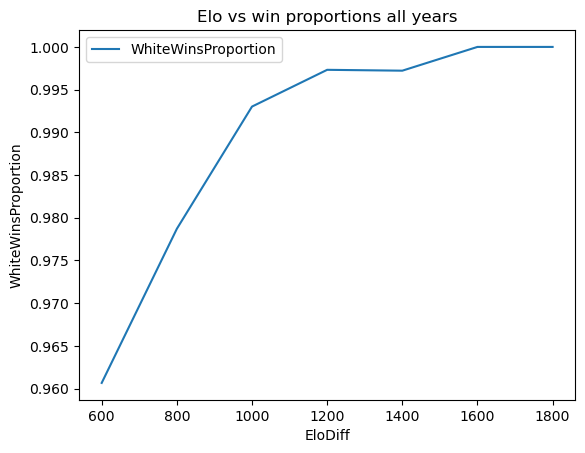

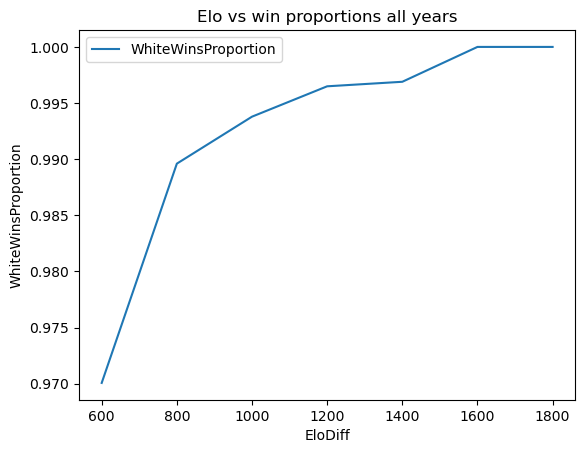

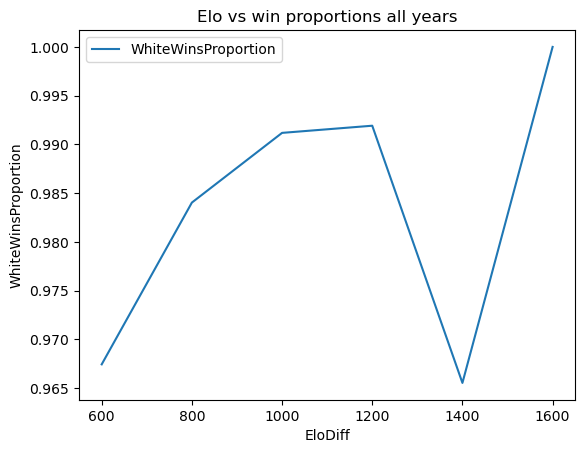

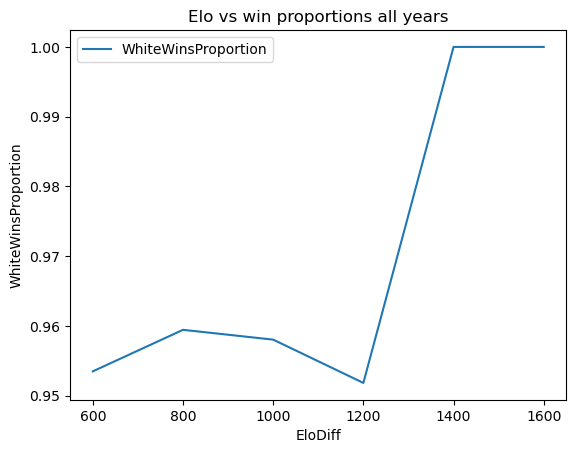

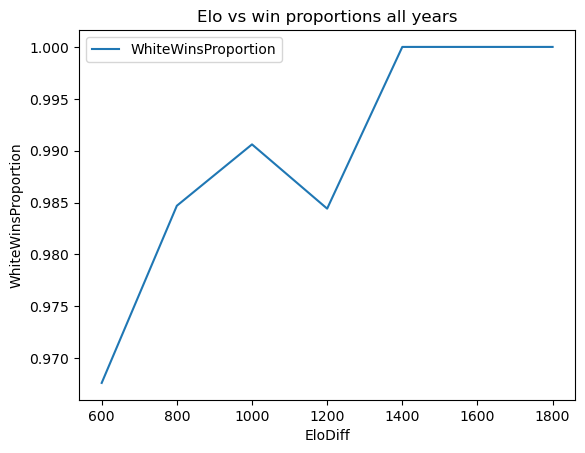

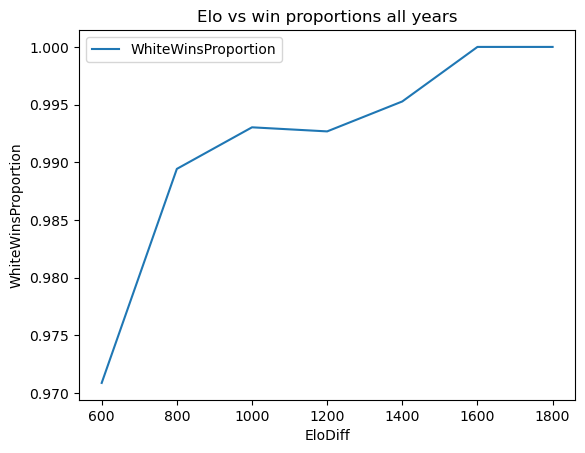

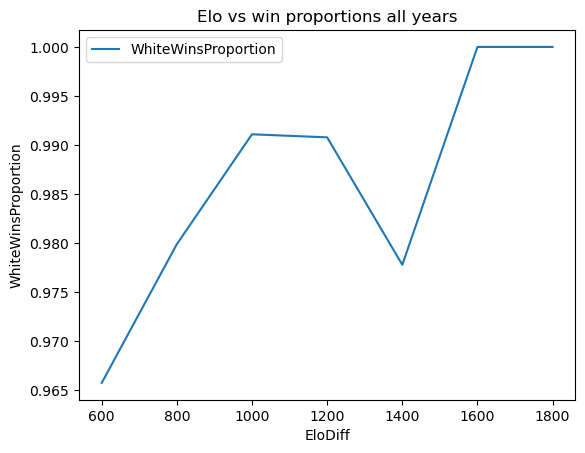

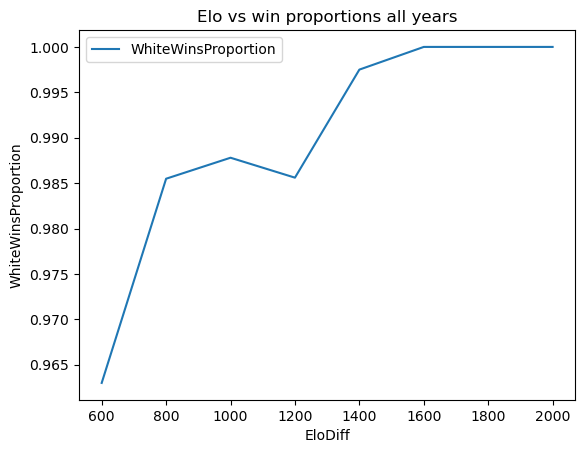

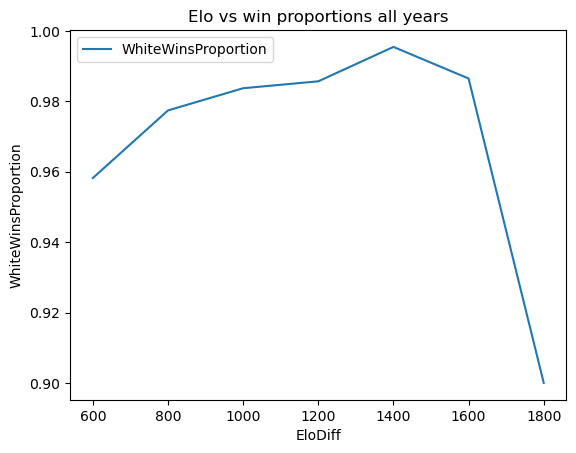

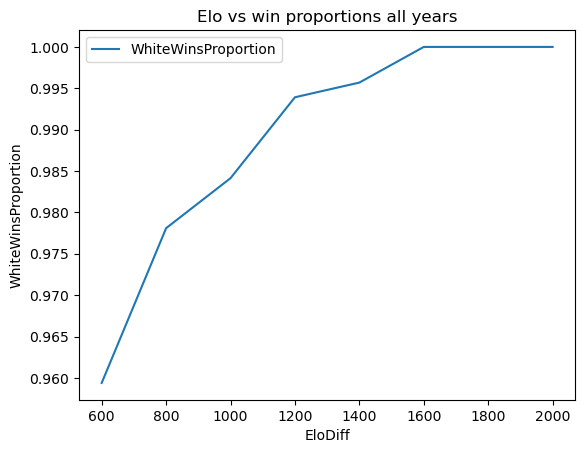

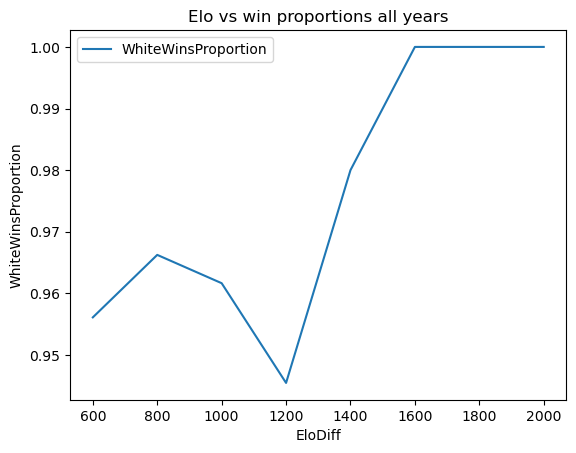

In [37]:

for year in sorted(list(set(df["Year"]))):
    frames=[]
    for diff in np.arange(600,3601, 200):
        frames.append(win_rate_by_elo_diff(df[df["Year"]==year],diff))

    frames_df=pd.concat(frames)

    frames_df=pd.concat(frames)
    print("-"*50,"Player ratio for year",year,"-"*50)
    display(frames_df)
    ax= frames_df.plot.line(x='EloDiff', y='WhiteWinsProportion')

    ax.set_xlabel("EloDiff")
    ax.set_ylabel("WhiteWinsProportion")
    ax.set_title("Elo vs win proportions all years")

    ax.figure.savefig(f"{PROJECT_PATH}/reports/figures/fics/Elo-vs-win-proportions-{year}.png")

In [10]:
win_freq2=Counter(df[df["EloDiff"] > 20]["Result"])
white_won2=win_freq2["1-0"]
draw2=win_freq2["1/2-1/2"]
black_won2=win_freq2["0-1"]
total2=white_won2+draw2+black_won2
white_wins_proportion2 = white_won2 / total2
white_loss_proportion2 = black_won2 / total2
draw_proportion2 = draw2 / total2
print(
    f"Out of {total2} games:\n  White won {white_won2} games "
    f"({white_wins_proportion2:.2%}).\n  White lost {black_won2} games "
    f"({white_loss_proportion2:.2%}).\n"
    f"  White draw {draw2} games ({draw_proportion2:.2%}).  "
)

Out of 8139709 games:
  White won 5506728 games (67.65%).
  White lost 2279695 games (28.01%).
  White draw 353286 games (4.34%).  


#### Elo distributions

In [13]:
def get_elo_freq(df):
    freq_elo_black=Counter(list(df["BlackElo"]))
    freq_elo_white=Counter(list(df["WhiteElo"]))
    both={}
    for k,v in freq_elo_black.items():
        both[k]=v

    for k,v in freq_elo_white.items():
        both[k]=both.get(k,0)+v
    keys=list(both.keys())
    vals=list(both.values())
    frame=pd.DataFrame({
        'Elo':keys,
        'Count':vals,
    }).sort_values('Count',ascending=True)
    return frame

/tmp/ipykernel_39898/2039240596.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups=elo_freq.groupby('group').sum(["count"]).drop(columns="Elo")["Count"]


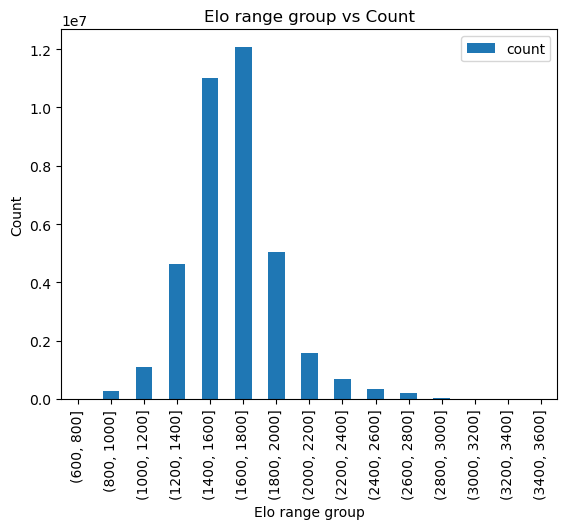

In [16]:
elo_freq=get_elo_freq(df)
elo_freq=elo_freq[["Elo","Count"]]
rating_bins = np.arange(600,3601, 200)
cuts=pd.cut(elo_freq["Elo"], bins=rating_bins)
elo_freq["group"]=cuts
groups=elo_freq.groupby('group').sum(["count"]).drop(columns="Elo")["Count"]
elo_freq=pd.DataFrame.from_dict({'group':list(groups.index.astype(str)),'count':list(groups.values)})
ax=elo_freq.plot(kind='bar',x='group',y='count')
ax.set_xlabel("Elo range group")
ax.set_ylabel("Count")
ax.set_title("Elo range group vs Count")

ax.figure.savefig(f"{PROJECT_PATH}/reports/figures/fics/Elo-range-group-vs-Count-all-years.png")

/tmp/ipykernel_39898/845625475.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups=elo_freq.groupby('group').sum(["count"]).drop(columns="Elo")["Count"]
/tmp/ipykernel_39898/845625475.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups=elo_freq.groupby('group').sum(["count"]).drop(columns="Elo")["Count"]
/tmp/ipykernel_39898/845625475.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups=elo_freq.group

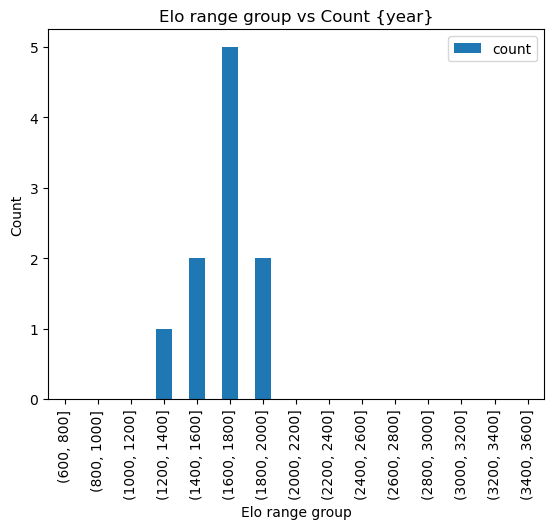

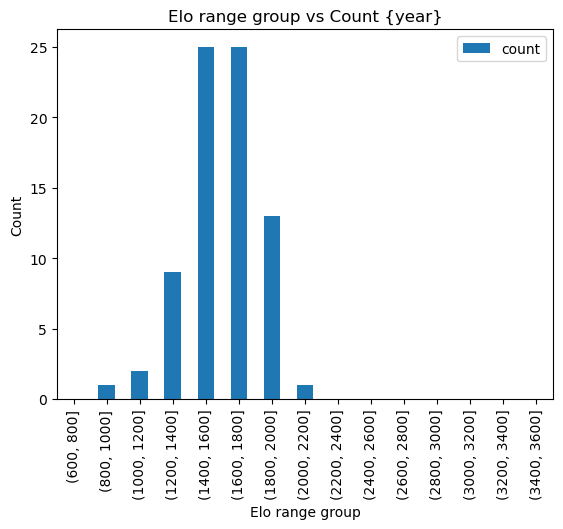

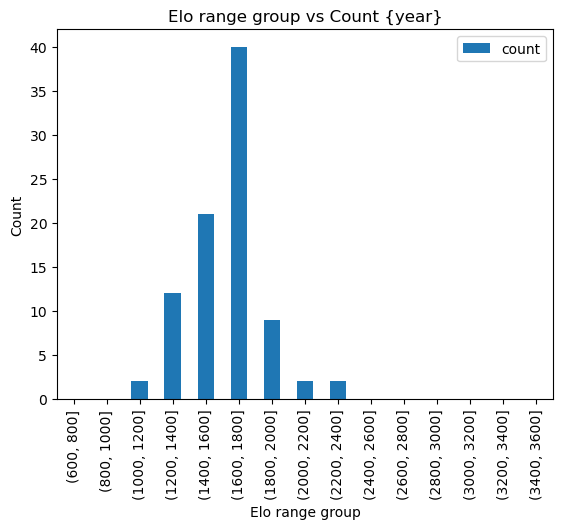

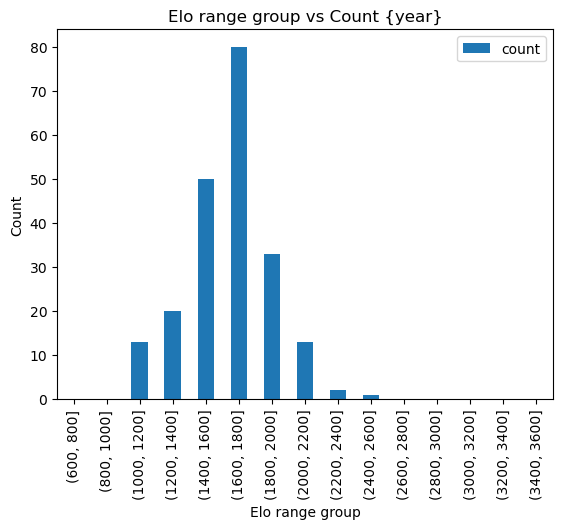

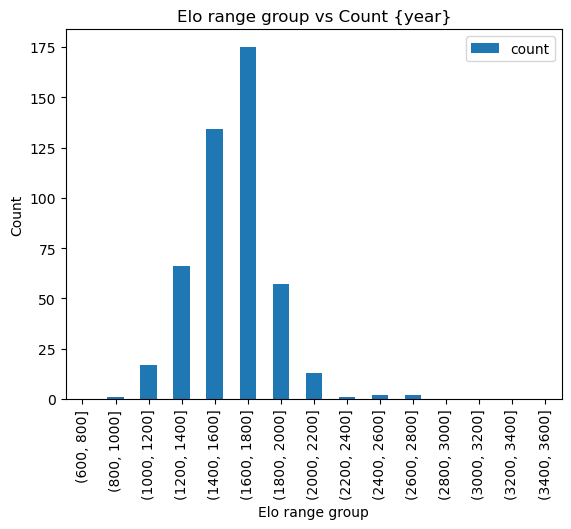

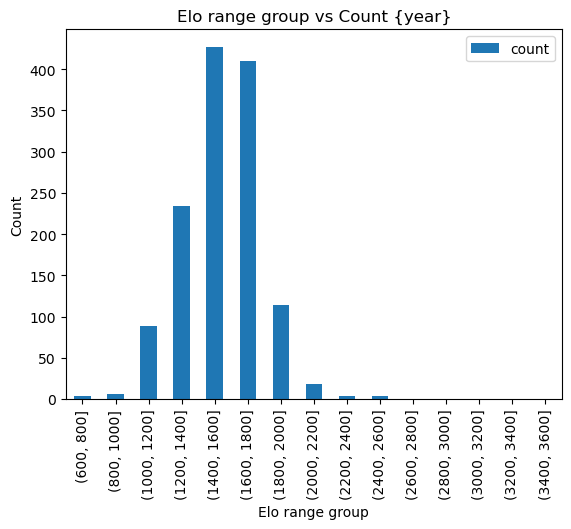

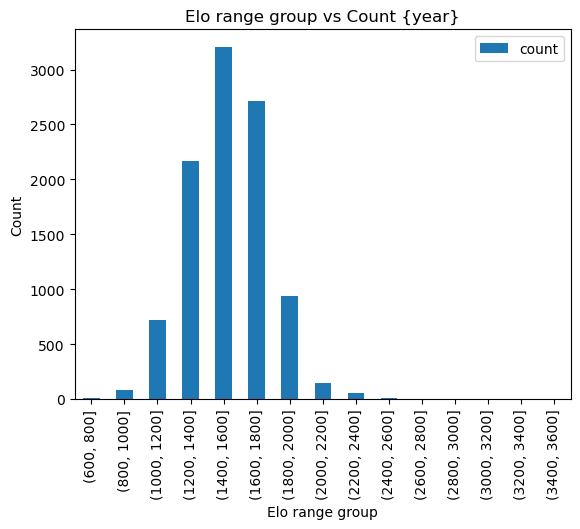

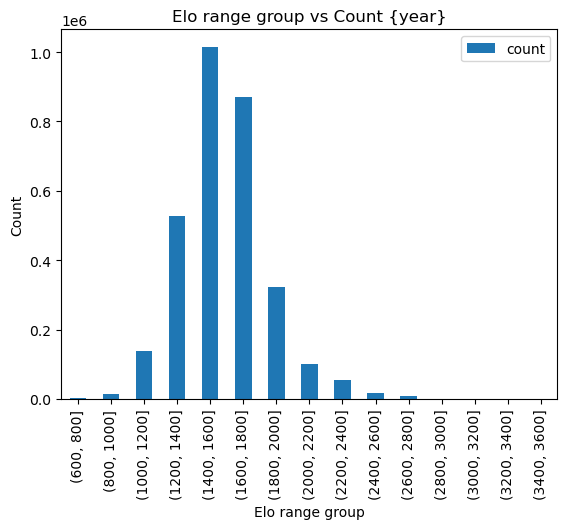

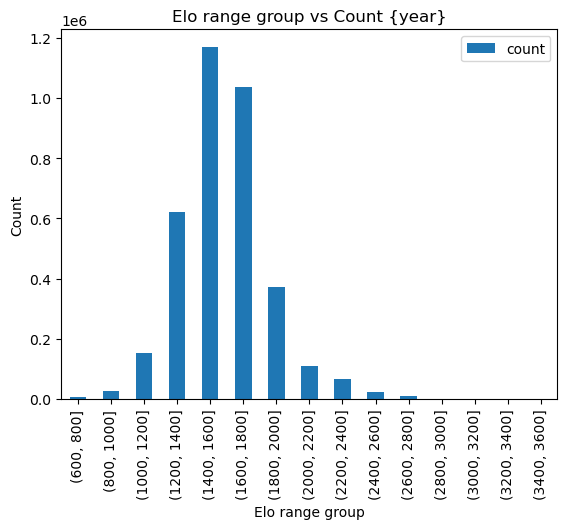

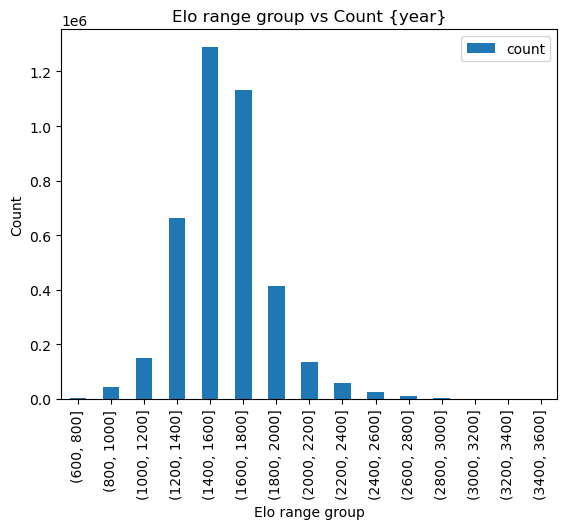

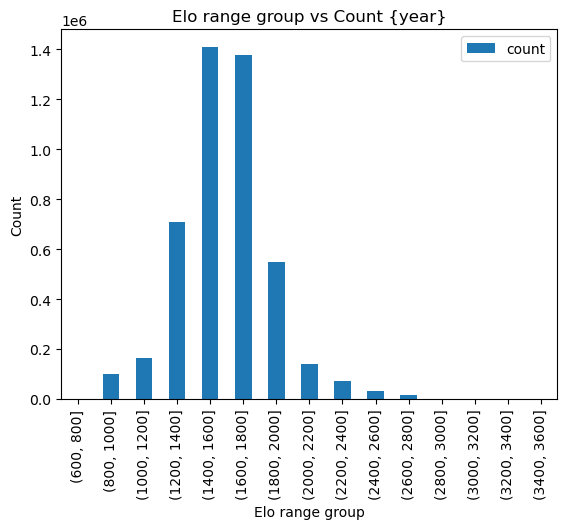

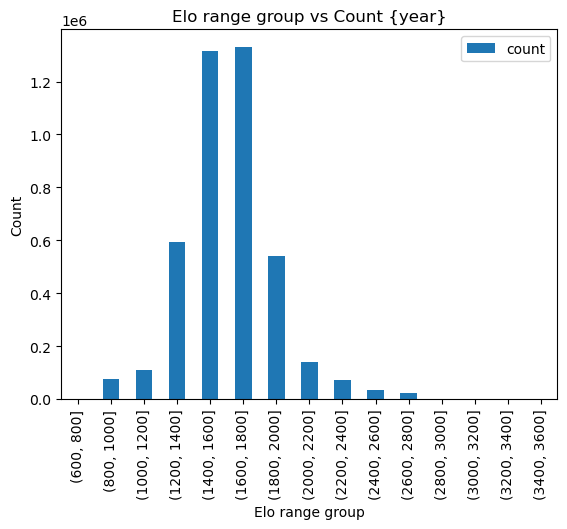

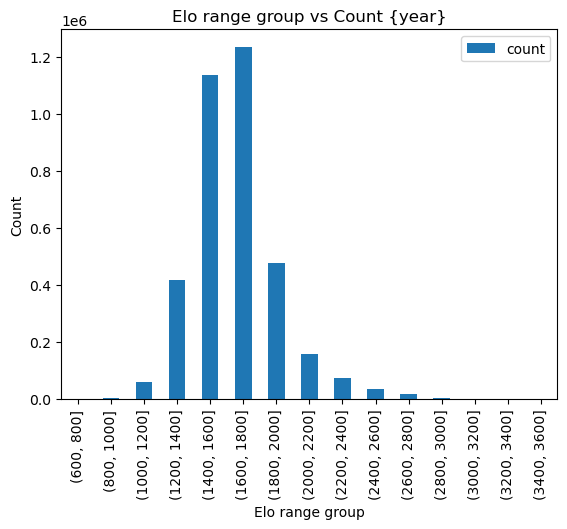

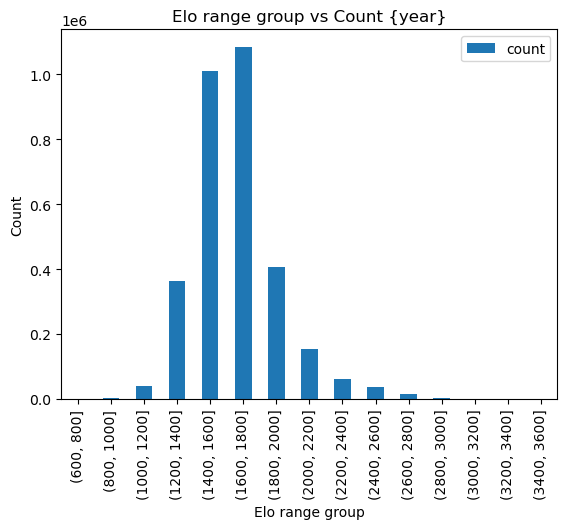

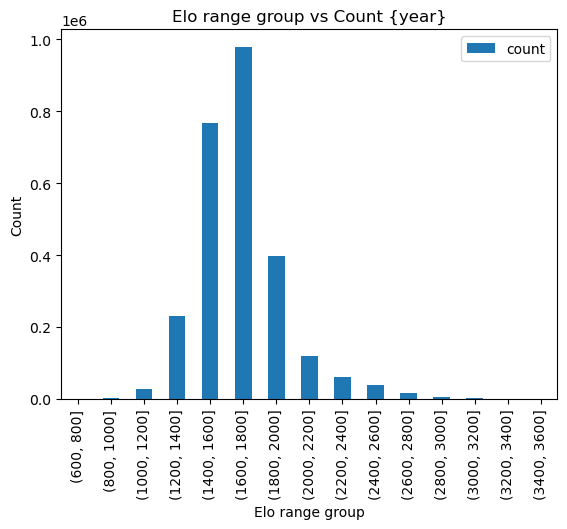

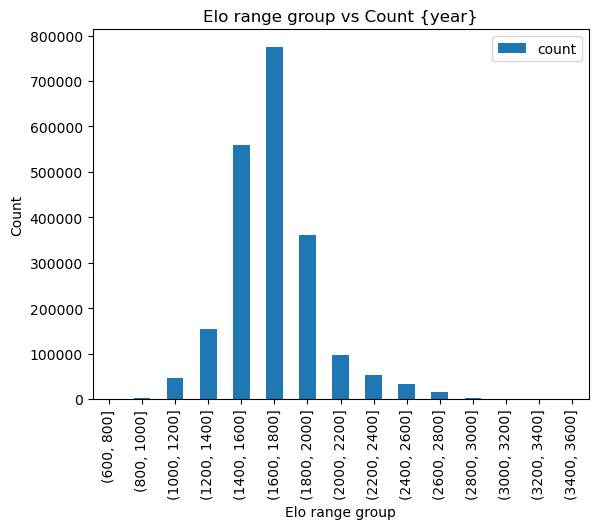

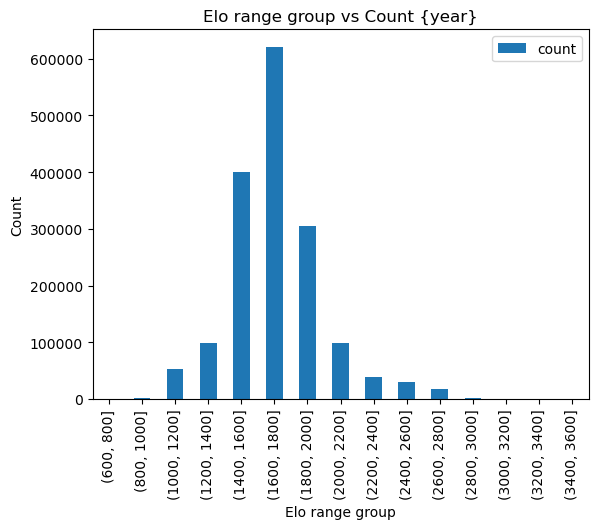

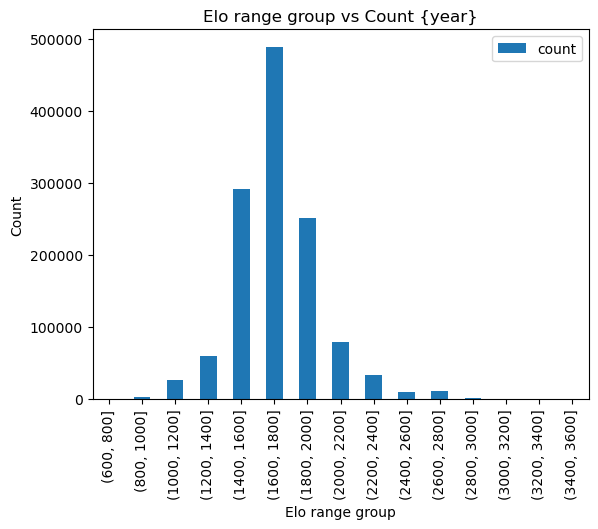

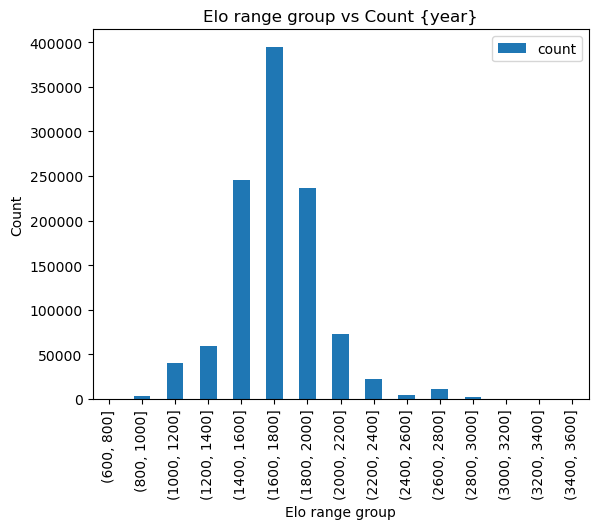

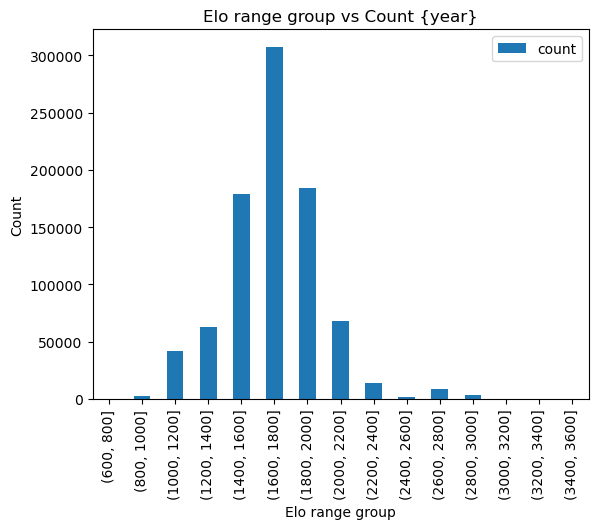

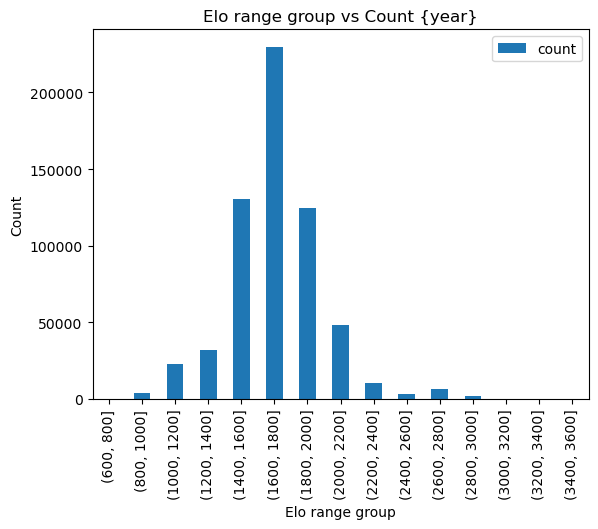

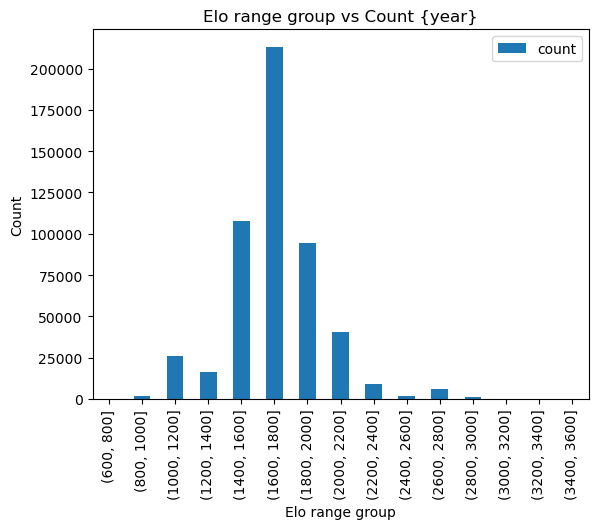

In [38]:
for year in sorted(list(set(df["Year"]))):
    elo_freq=get_elo_freq(df[df["Year"]==year])
    elo_freq=elo_freq[["Elo","Count"]]
    rating_bins = np.arange(600,3601, 200)
    cuts=pd.cut(elo_freq["Elo"], bins=rating_bins)
    elo_freq["group"]=cuts
    groups=elo_freq.groupby('group').sum(["count"]).drop(columns="Elo")["Count"]
    elo_freq=pd.DataFrame.from_dict({'group':list(groups.index.astype(str)),'count':list(groups.values)})
    ax=elo_freq.plot(kind='bar',x='group',y='count')
    ax.set_title(f"Elo range group vs count for {year}")
    ax.set_xlabel("Elo range group")
    ax.set_ylabel("Count")
    ax.set_title("Elo range group vs Count {year}")
    ax.figure.savefig(f"{PROJECT_PATH}/reports/figures/fics/Elo-range-group-vs-Count-{year}.png")

/tmp/ipykernel_39898/2052553180.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups=elo_freq.groupby('group').sum(["count"]).drop(columns="Elo")["Count"]
/tmp/ipykernel_39898/2052553180.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups=elo_freq.groupby('group').sum(["count"]).drop(columns="Elo")["Count"]


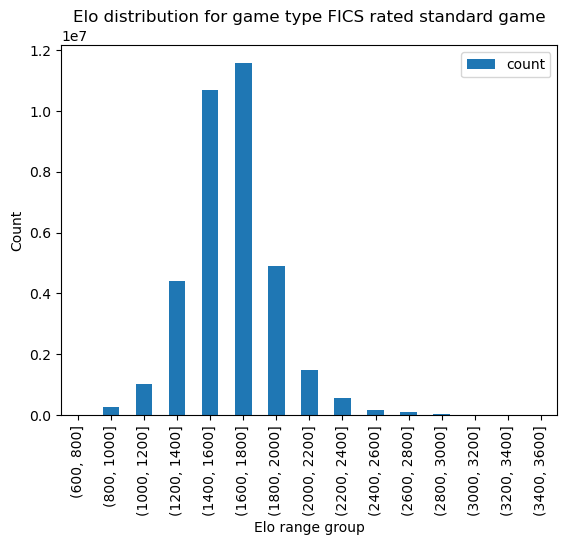

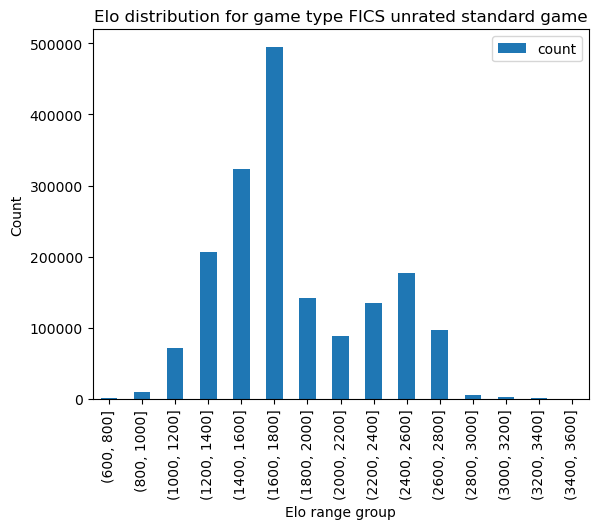

In [17]:
events=list(set(list(df["Event"])))


for e in events:
    df_e=df[df["Event"]==e]

    elo_freq=get_elo_freq(df_e)
    elo_freq=elo_freq[["Elo","Count"]]
    rating_bins = np.arange(600,3601, 200)
    cuts=pd.cut(elo_freq["Elo"], bins=rating_bins)
    elo_freq["group"]=cuts
    groups=elo_freq.groupby('group').sum(["count"]).drop(columns="Elo")["Count"]
    elo_freq=pd.DataFrame.from_dict({'group':list(groups.index.astype(str)),'count':list(groups.values)})
    ax=elo_freq.plot(kind='bar',x='group',y='count')
    ax.set_xlabel("Elo range group")
    ax.set_ylabel("Count")
    ax.set_title(f"Elo distribution for game type {e}")
    ax.figure.savefig(f"{PROJECT_PATH}/reports/figures/fics/Elo-range-group-vs-Count-all-years-{e}.png")

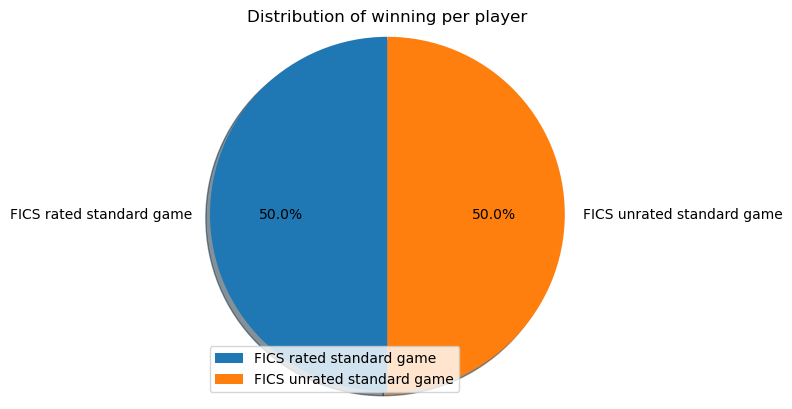

In [20]:
import matplotlib.pyplot as plt


by_event={e:len(df["Event"]==e) for e in list(set(list(df["Event"])))}
# defining labels
activities = list(by_event.keys())

# portion covered by each label
slices = list(by_event.values())

# color for each label
colors = ['r', 'y', 'g', 'b']

# plotting the pie chart
ax=plt.pie(slices, labels = activities,
        startangle=90, shadow = True,
        radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()
plt.title("Distribution of winning per player")


plt.savefig(f"{PROJECT_PATH}/reports/figures/fics/Distribution-of-winning-per-player-all-years-{e}.png")

# showing the plot
plt.show()


#### Number of games distributions

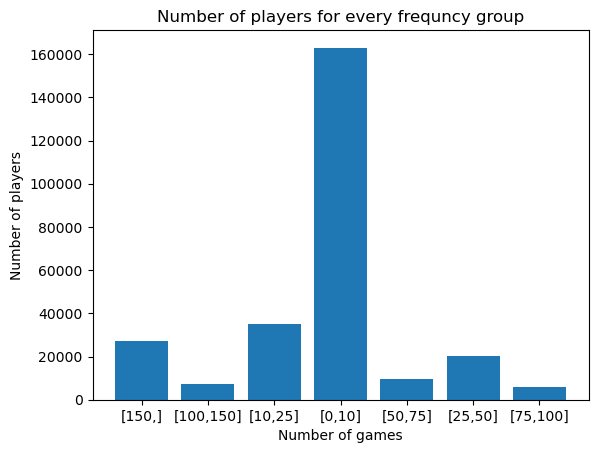

In [21]:
from collections import Counter
white_freq=Counter(list(df["White"]))
black_freq=Counter(list(df["Black"]))
all_freq=white_freq

for k,v in black_freq.items():
    all_freq[k]=all_freq.get(k,0)+v

count_freq={}
for k,v in all_freq.items():
    if v <=10:
        count_freq["[0,10]"]=count_freq.get("[0,10]",0)+1
    elif v <=25:
        count_freq["[10,25]"]=count_freq.get("[10,25]",0)+1
    elif v <=50:
        count_freq["[25,50]"]=count_freq.get("[25,50]",0)+1
    elif v <=75:
        count_freq["[50,75]"]=count_freq.get("[50,75]",0)+1
    elif v <=100:
        count_freq["[75,100]"]=count_freq.get("[75,100]",0)+1
    elif v <=150:
        count_freq["[100,150]"]=count_freq.get("[100,150]",0)+1
    else:
        count_freq["[150,]"]=count_freq.get("[150,]",0)+1

x = list(count_freq.keys())
y = list(count_freq.values())
plt.xlabel('Number of games')
plt.ylabel('Number of players')
plt.title('Number of players for every frequncy group')
plt.bar( x, y)
plt.savefig(f"{PROJECT_PATH}/reports/figures/fics/Number-of-players-for-every-frequncy-group.png")


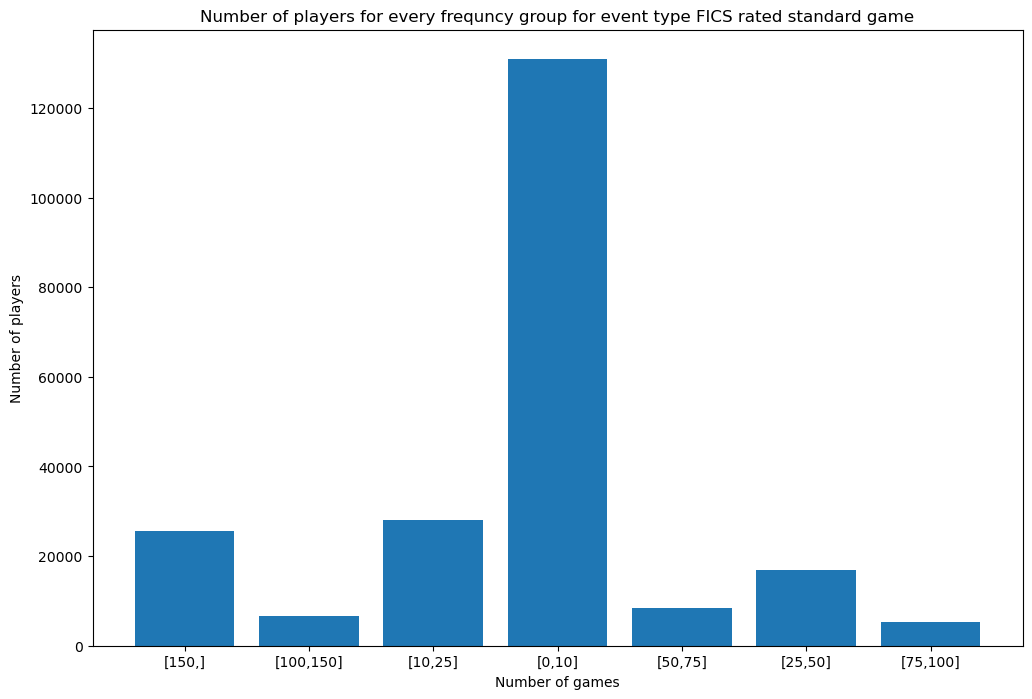

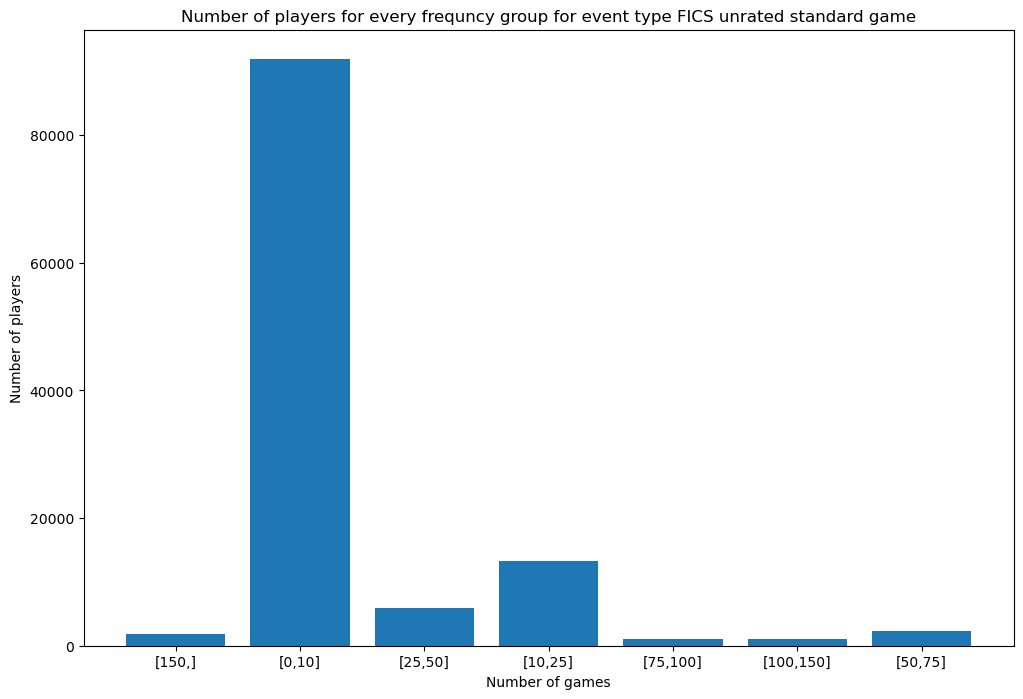

In [27]:
from collections import Counter

events=list(set(list(df["Event"])))


for e in events:
    df_e=df[df["Event"]==e]
    white_freq=Counter(list(df_e["White"]))
    black_freq=Counter(list(df_e["Black"]))
    all_freq=white_freq

    for k,v in black_freq.items():
        all_freq[k]=all_freq.get(k,0)+v

    count_freq={}
    for k,v in all_freq.items():
        if v <=10:
            count_freq["[0,10]"]=count_freq.get("[0,10]",0)+1
        elif v <=25:
            count_freq["[10,25]"]=count_freq.get("[10,25]",0)+1
        elif v <=50:
            count_freq["[25,50]"]=count_freq.get("[25,50]",0)+1
        elif v <=75:
            count_freq["[50,75]"]=count_freq.get("[50,75]",0)+1
        elif v <=100:
            count_freq["[75,100]"]=count_freq.get("[75,100]",0)+1
        elif v <=150:
            count_freq["[100,150]"]=count_freq.get("[100,150]",0)+1
        else:
            count_freq["[150,]"]=count_freq.get("[150,]",0)+1
    plt.figure(figsize=(12, 8))
    x = list(count_freq.keys())
    y = list(count_freq.values())
    plt.xlabel('Number of games')
    plt.ylabel('Number of players')
    plt.title(f'Number of players for every frequncy group for event type {e}')
    plt.bar( x, y)
    plt.savefig(f"{PROJECT_PATH}/reports/figures/fics/Number-of-players-for-every-frequncy-group-for-event-type-{e}.png")


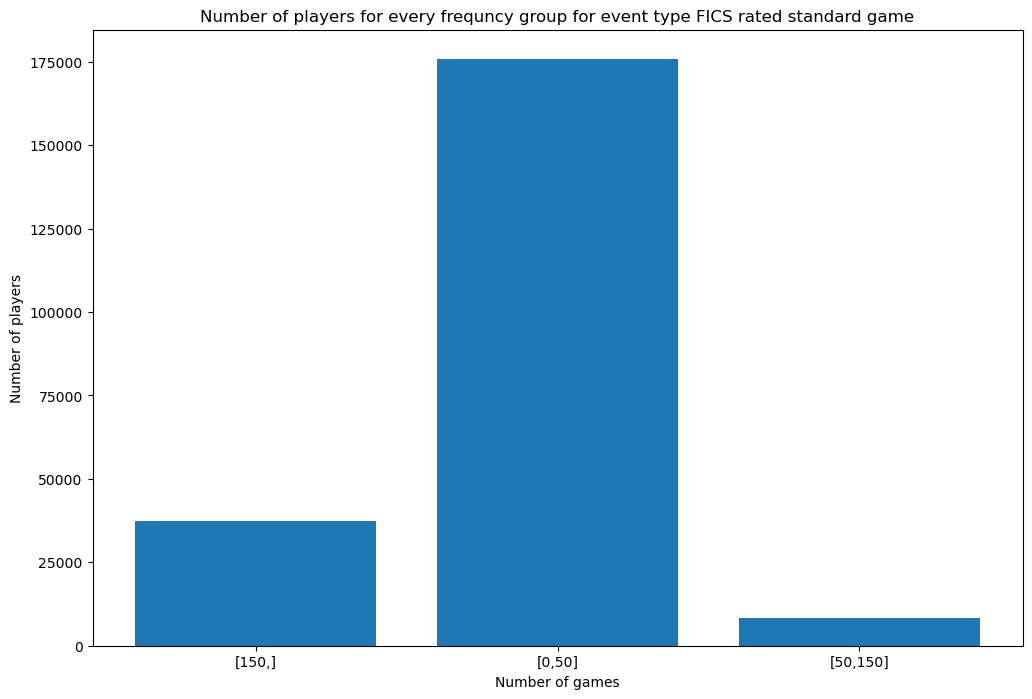

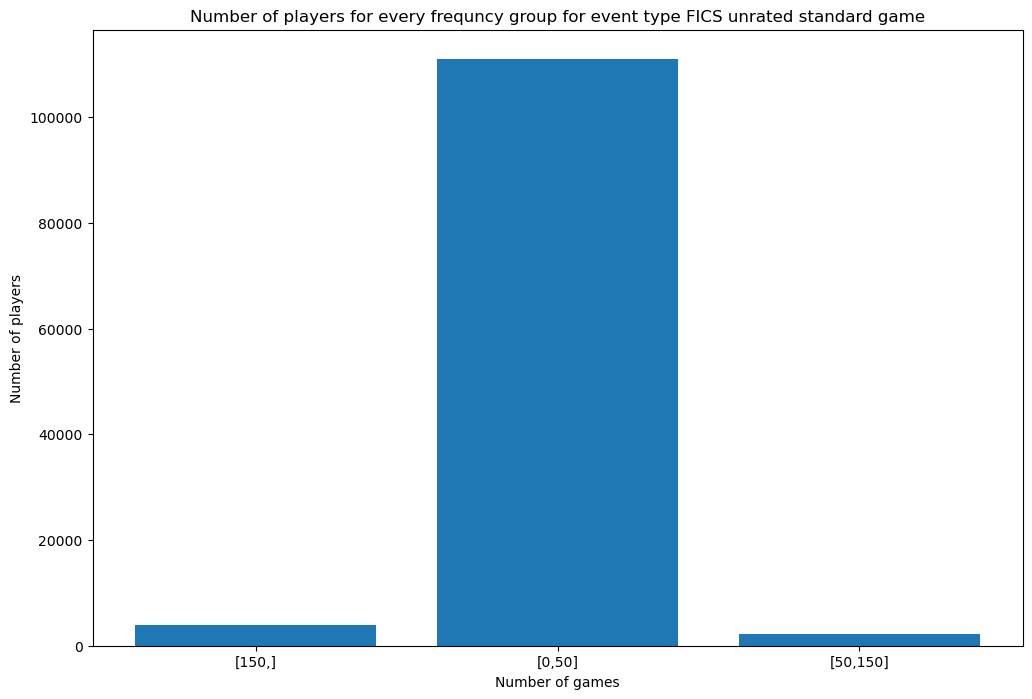

In [26]:
from collections import Counter

events=list(set(list(df["Event"])))


for e in events:
    df_e=df[df["Event"]==e]
    white_freq=Counter(list(df_e["White"]))
    black_freq=Counter(list(df_e["Black"]))
    all_freq=white_freq

    for k,v in black_freq.items():
        all_freq[k]=all_freq.get(k,0)+v

    count_freq={}
    for k,v in all_freq.items():
        if v <=50:
            count_freq["[0,50]"]=count_freq.get("[0,50]",0)+1
        elif v <=75:
            count_freq["[50,150]"]=count_freq.get("[50,150]",0)+1
        else:
            count_freq["[150,]"]=count_freq.get("[150,]",0)+1
    plt.figure(figsize=(12, 8))
    x = list(count_freq.keys())
    y = list(count_freq.values())
    plt.xlabel('Number of games')
    plt.ylabel('Number of players')
    plt.title(f'Number of players for every frequncy group for event type {e}')
    plt.bar( x, y)
    plt.savefig(f"{PROJECT_PATH}/reports/figures/fics/Number-of-players-for-every-frequncy-group-event-{e}-less_grouping.png")
